In [7]:
import getpass
import os
from IPython.display import Image, display

# Check if the environment variable for the OpenAI API key is not set
if not os.environ.get("OPENAI_API_KEY"):
  # Prompt the user to enter the OpenAI API key securely
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

## Financial Analysis on Invoice / Bills

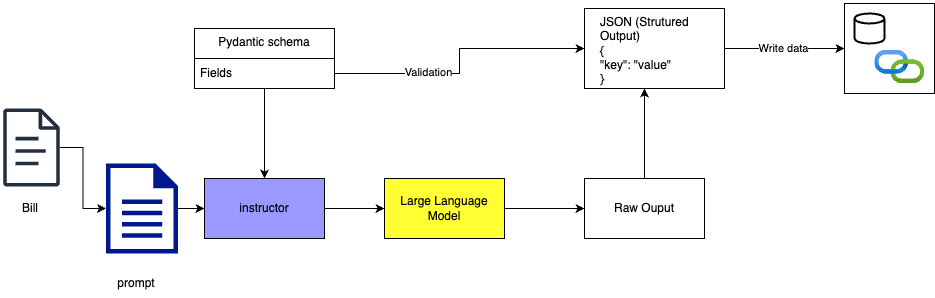

In [9]:
display(Image(filename="images/bill_parser.png"))

In [10]:
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI()

# URL of the image to be analyzed
url = "https://fastly.4sqi.net/img/general/width960/23944019_yfWbqBjhhLPNw4K7NVDx6WzVtfJEzjKYnJ-nuS0RAak.jpg"

# Create a chat completion request to analyze the image and return the items in the receipt and the total amount
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Analyze the image and return the items in the receipt and the total amount."},
                {"type": "image_url", "image_url": {"url": url}},
            ],
        }
    ],
    max_tokens=1800,
)

# Print the response from the API
print(response)

ChatCompletion(id='chatcmpl-B3bJDQMirMoQDFKzuljSSht0psAK8', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Here are the items from the receipt and their corresponding amounts:\n\n1. NstlChkie110ml - 125.00\n2. CharnNap4Alf1Tw8s - 20.00\n3. NES Yog BerryMix - 43.00\n4. NES Yog Straw110 - 43.00\n5. DARICRMBttr200g - 54.00\n6. MARBY Pinoy Loaf - 55.75\n7. NLfJ Mango Big (0.480 X 162.00) - 77.76\n8. SMB Patola Chins (2.115 X 60.00) - 18.92\n9. NLfJ UnelanStrpe (0.810 X 172.00) - 126.90\n10. NLfJ Avocado - 139.32\n\n**Subtotal:** 757.65  \n**Total:** 757.65', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1740198099, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_7fcd609668', usage=CompletionUsage(completion_tokens=199, prompt_tokens=1160, total_tokens=1359, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0,

In [11]:
from pydantic import BaseModel

# Define a class to represent an item in the receipt
class Item(BaseModel):
    name: str  # Name of the item
    price: float  # Price of the item
    quantity: int  # Quantity of the item

# Define a class to represent the receipt
class Receipt(BaseModel):
    store: str  # Name of the store
    items: list[Item]  # List of items in the receipt
    total: float  # Total amount of the receipt
    payment_mode: str  # Payment mode used for the transaction

In [4]:
import instructor
from openai import OpenAI

client = instructor.from_openai(OpenAI())

In [5]:
# URL of the image to be analyzed
url = "https://sandinmycurls.com/wp-content/uploads/2021/03/reciept-1-1-525x700.jpeg"
#url = "https://fastly.4sqi.net/img/general/width960/23944019_yfWbqBjhhLPNw4K7NVDx6WzVtfJEzjKYnJ-nuS0RAak.jpg"
#url = "https://www.shutterstock.com/shutterstock/photos/2349655309/display_1500/stock-photo-gresik-indonesia-august-food-purchase-receipt-at-mie-gacoan-on-august-2349655309.jpg"

# Initialize the instructor client with OpenAI and set the mode to MD_JSON for function calls
client = instructor.from_openai(OpenAI(), mode=instructor.function_calls.Mode.MD_JSON)

# Create a chat completion request to analyze the image and return the items in the receipt and the total amount
receipt = client.chat.completions.create(
    model="gpt-4o-mini",
    response_model=Receipt,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Analyze the image and return the items in the receipt and the total amount."},
                {"type": "image_url", "image_url": {"url": url}},
            ],
        }
    ],
    max_tokens=1800,
)

# Print the store name from the receipt
print("\nStore:         ", receipt.store)

# Print the items in the receipt
print("\nItems:")
print("{:<25} {:<10} {:<10}".format("Name", "Price", "Quantity"))
print("-" * 50)
for item in receipt.items:
    # Print each item with its name, price, and quantity
    print("{:<25} {:<9.2f} {:<10}".format(item.name, item.price, item.quantity))

# Print the total amount of the receipt
print("\nTotal:         ", receipt.total)

# Print the payment mode used for the transaction
print("\nPayment Mode:  ", receipt.payment_mode)


Store:          COLD STORAGE ISLAND PLAZA

Items:
Name                      Price      Quantity  
--------------------------------------------------
BB ROMAINE LETTUCE        1.99      1         
CUCUMBER                  1.17      1         
LACTO WHOLEG              11.56     1         
CAPSICUM RED              4.70      1         
LA CREME VAN 750ML        14.59     1         
AR PLAIN BAGUETTE L       4.30      1         
KG WHT CHDR 150G          13.76     1         
SHH-MORNING EGG (L)       5.59      1         
H. FRESH - TOMATO         2.85      1         
ROASTED WH CHIC B/P       15.30     1         
CAP GREEN LOCAL KG        3.10      1         

Total:          81.95

Payment Mode:   CASH
